MARIA KARTHIKA S  
215229123

# CREDIT CARD FRAUD DETECTION

# Problem Statement:

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

In [1]:
# Some mandatory Libraries
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

#EDA Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Classifier Libraries
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Other Libraries
from tqdm import tqdm
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


## [01] Read Data:

In [3]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print('Our total data point: ', df.shape)

# Total data points are 284807

Our total data point:  (284807, 31)


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

# No null values present in data frame.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# The classes are heavily skewed we need to solve this issue later.
print('No. of frauds in persentage: ', round(df['Class'].value_counts()[0]/len(df) * 100,2))
print('No. of no frauds in persentage: ', round(df['Class'].value_counts()[1]/len(df) * 100,2))

No. of frauds in persentage:  99.83
No. of no frauds in persentage:  0.17


**Note:** 

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our models and analysis we might get miss intiution.

## [02] EDA:

Here let's find some insights about our data.

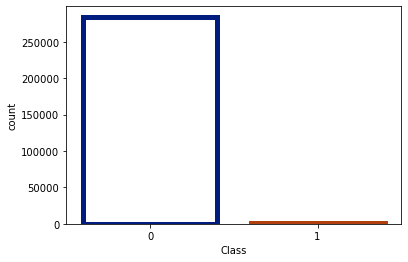

In [9]:
ax = sns.countplot(x='Class', data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))

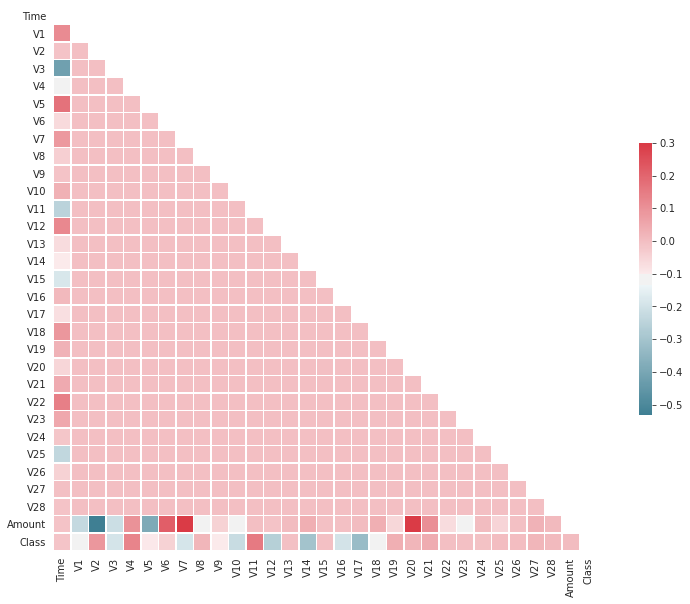

In [10]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15,10))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5})

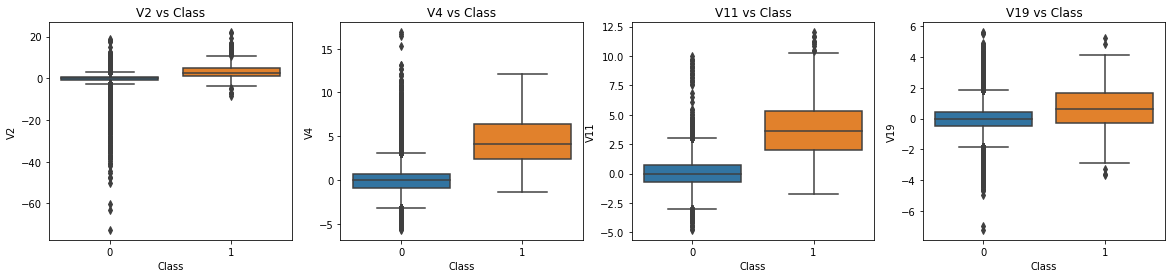

In [11]:
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class', y='V2', data=df, ax=axes[0])
axes[0].set_title('V2 vs Class')

sns.boxplot(x='Class', y='V4', data=df, ax=axes[1])
axes[1].set_title('V4 vs Class')

sns.boxplot(x='Class', y='V11', data=df, ax=axes[2])
axes[2].set_title('V11 vs Class')

sns.boxplot(x='Class', y='V19', data=df, ax=axes[3])
axes[3].set_title('V19 vs Class')

plt.show()

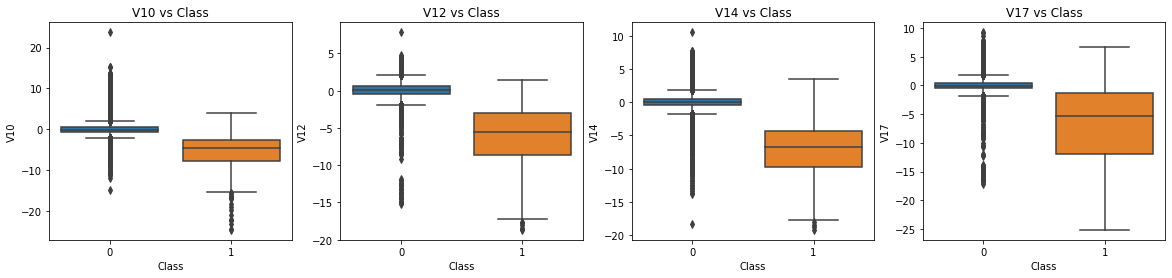

In [12]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class', y='V10', data=df, ax=axes[0])
axes[0].set_title('V10 vs Class')

sns.boxplot(x='Class', y='V12', data=df, ax=axes[1])
axes[1].set_title('V12 vs Class')

sns.boxplot(x='Class', y='V14', data=df,  ax=axes[2])
axes[2].set_title('V14 vs Class')

sns.boxplot(x='Class', y='V17', data=df, ax=axes[3])
axes[3].set_title('V17 vs Class')

plt.show()

Here we can see we have some extream outliers in V10, V11, V12, V14. We will remove those when we preprocess our data.

## [03] Data Preprocessing:

In [17]:
# New_df is from the random undersample data (fewer instances)

X = df_final.drop('Class', axis=1)
Y = df_final['Class']

###  StandardScaler:

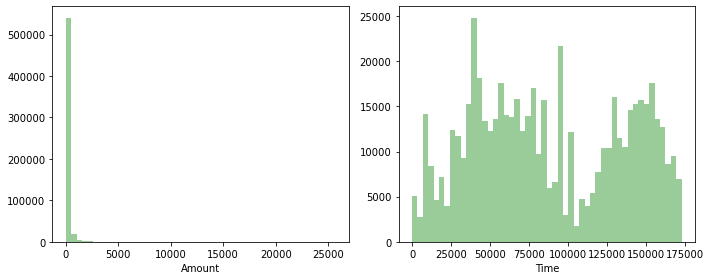

In [20]:
# Before StandardScaler:

f, axes = plt.subplots(ncols=2, figsize=(10,4))

sns.distplot(df_final['Amount'], kde=False, color="g", ax=axes[0])

sns.distplot(df_final['Time'], kde=False, color="g", ax=axes[1])

plt.tight_layout()

In [21]:
# Create the Scaler object
scaler = StandardScaler()

# Fit and Transform Amount
scaler.fit(df_final['Amount'].values.reshape(-1, 1))
df_final['std_Amount'] = scaler.transform(df_final['Amount'].values.reshape(-1, 1))

# Fit and Transform Time
scaler.fit(df_final['Time'].values.reshape(-1, 1))
df_final['std_Time'] = scaler.transform(df_final['Time'].values.reshape(-1, 1))

# Delete old features
df_final.drop(['Time','Amount'], axis=1, inplace=True)

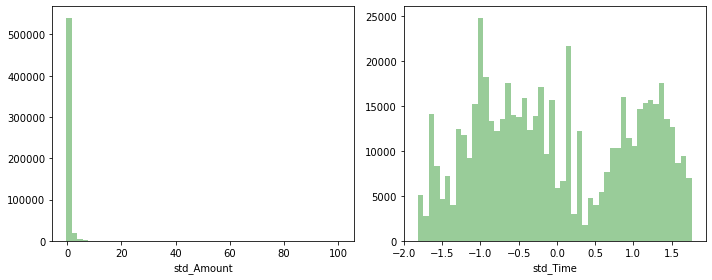

In [22]:
# After StandardScaler:

f, axes = plt.subplots(ncols=2, figsize=(10,4))

sns.distplot(df_final['std_Amount'], kde=False, color="g", ax=axes[0])

sns.distplot(df_final['std_Time'], kde=False, color="g", ax=axes[1])

plt.tight_layout()

##  Classifiers:

### [4.1] Train Test Split:

__Note:__ Accuracy score might not work as expected as we have some extream outliers and immabalced nature of data.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=22)

### [4.2] Model Training:

In [24]:
# Define classifiers with default parameters.

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Linear Regression":linear_model.LinearRegression(),
    "Gaussian NB": GaussianNB()
}

In [25]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train) 
    training_score = cross_val_score(classifier, X_train, y_train, cv=3)
    print('Classifiers: ',name, 'has a training score of', round(training_score.mean(),2) * 100)

Classifiers:  Logisitic Regression has a training score of 94.0
Classifiers:  KNN has a training score of 100.0
Classifiers:  Linear Regression has a training score of 64.0
Classifiers:  Gaussian NB has a training score of 87.0


KNN's test accuracy is quite good in compare to other. Let's try to improve LR model using hyper parameter tuning.

### Logistic Regression:

In [26]:
# LogisticRegression
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gs = GridSearchCV(LogisticRegression(), params, cv = 3, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

log_reg = gs.best_estimator_ # store best estimators for future analysis

print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.943189269339102
Best Parametrs:  {'C': 0.1, 'penalty': 'l2'}


# KNN

In [27]:

params = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}

gs = GridSearchCV(KNeighborsClassifier(), params, cv = 3, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

knears_neighbors = gs.best_estimator_ # store best estimators for future analysis

print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.9994573426559686
Best Parametrs:  {'n_neighbors': 1, 'weights': 'uniform'}


In [28]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=3)
print('LR CV Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=3)
print('KNN CV Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

LR CV Score:  94.1%
KNN CV Score:  99.95%


As we know KNN impact allot by outliers so let's go with the LR and check our test accuracy.

### Accuracy on Test Data:

In [29]:
model = LogisticRegression(penalty = 'l2', C = 0.1)
model.fit(X_train,y_train)
pridict = model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, pridict))

Accuracy:  0.9376806241903054


###  Confusion Matrix:

In [30]:
cm = confusion_matrix(y_test, pridict)
labels = ['No Fraud', 'Fraud']
print(pd.DataFrame(cm, index=labels, columns=labels))

          No Fraud  Fraud
No Fraud     82121   3151
Fraud         7480  77837


### ROC Curve:

In [31]:
lr_pred_prob = model.predict_proba(X_test)[:,1]
fpr,tpr,thrsld = roc_curve(y_test,lr_pred_prob)
print('AUC score:',roc_auc_score(y_test,lr_pred_prob))

AUC score: 0.9773635808480894


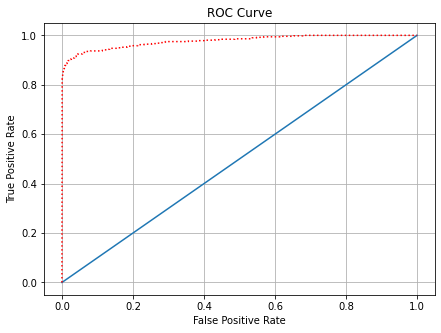

In [32]:
# Ploting ROC Curve 

plt.figure(figsize=(7,5))
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,':', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()